In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

# Combine the data into a single dataset
combined_data_df = pd.merge(ride_data_df, city_data_df, on='city')


# Display the data table for preview
combined_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

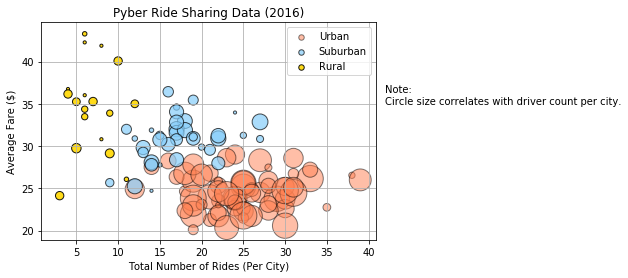

<Figure size 432x288 with 0 Axes>

In [14]:
# Obtain the x and y coordinates for each of the three city types
urban_type = combined_data_df[combined_data_df['type'] == "Urban"].groupby([combined_data_df['city']])                    
suburban_type = combined_data_df[combined_data_df['type'] == "Suburban"].groupby([combined_data_df['city']])
rural_type = combined_data_df[combined_data_df['type'] == "Rural"].groupby([combined_data_df['city']])  

#Total number of rides per city
urban_rides = (urban_type['ride_id'].count()) 
suburban_rides = (suburban_type['ride_id'].count())
rural_rides = (rural_type['ride_id'].count())


#Avg fair per city
urban_fare = (urban_type['fare'].mean())
suburban_fare = (suburban_type['fare'].mean())
rural_fare = (rural_type['fare'].mean())


#Avg Driver count per city
urban_driver = (urban_type['driver_count'].mean())
suburban_driver = (suburban_type['driver_count'].mean())
rural_driver = (rural_type['driver_count'].mean())


# Build the scatter plots for each city types
plt.scatter(urban_rides, urban_fare, marker="o", facecolors="coral", edgecolors="black", s=urban_driver * 10, alpha=0.5, label="Urban")
plt.scatter(suburban_rides, suburban_fare, marker="o", facecolors="lightskyblue", edgecolors="black", s=suburban_driver * 10, alpha=0.7, label="Suburban")
plt.scatter(rural_rides, rural_fare, marker="o", facecolors="gold", edgecolors="black", s=rural_driver * 10, alpha=0.9, label="Rural")



# Incorporate a text label regarding circle size
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.text(42, 35,"Note: \nCircle size correlates with driver count per city.")
plt.grid(True)
# Create a legend
#ttl_legend = plt.legend()
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.show()


# Save Figure
plt.savefig("data/pyberscatter.png")

## Total Fares by City Type

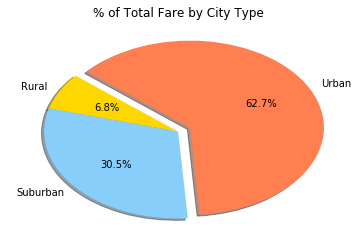

<Figure size 432x288 with 0 Axes>

In [5]:
# Calculate Type Percents
city_fare = combined_data_df.groupby(combined_data_df['type'])['fare'].sum()
Ttl_fare = combined_data_df['fare'].sum()
farept = (city_fare/Ttl_fare)*100                                                             


# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
#sizes = [220, 95, 80, 100]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "coral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

plt.pie(farept, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fare by City Type")

plt.show()

# Save Figure
plt.savefig("data/ttlfare.png")

## Total Rides by City Type

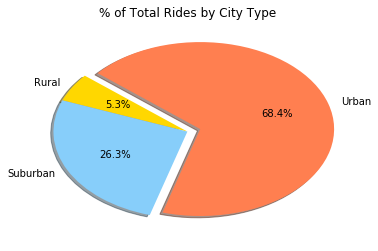

<Figure size 432x288 with 0 Axes>

In [6]:
# Calculate Ride Percents
city_ride = combined_data_df.groupby(combined_data_df['type'])['ride_id'].count()
Ttl_rides2 = combined_data_df['ride_id'].count()
ridept = (city_ride/Ttl_rides2)*100                                                             


# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "coral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

plt.pie(ridept, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")

plt.show()

# Save Figure
plt.savefig("data/ttlride.png")



## Total Drivers by City Type

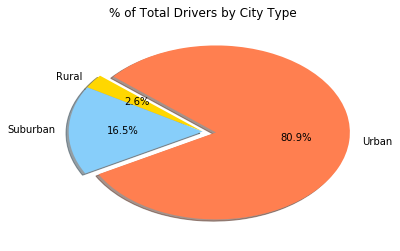

<Figure size 432x288 with 0 Axes>

In [9]:
# Calculate Driver Percents
city_driver = city_data_df.groupby(city_data_df['type'])['driver_count'].sum()
Ttl_drivers = city_data_df['driver_count'].count()
driverpt = (city_driver/Ttl_drivers)*100                                                             


# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "coral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

plt.pie(driverpt, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")

plt.show()

# Save Figure
plt.savefig("data/ttldriver.png")


In [16]:
#Extra calculations to help with my observations
print(city_fare)
print(city_driver)
avg_fare_driver = city_fare/city_driver
print(avg_fare_driver)



type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64
type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64
type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64
